In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sms = pd.read_csv('SMSSpamCollection', sep='\t',header=None)
sms.columns = ['tag','sms']
sms.head(10)

,tag,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [2]:
sms.shape

(5572, 2)

In [3]:
sms.tag.value_counts()

ham     4825
spam     747
Name: tag, dtype: int64

Imbalance between ham and spam classes. Sampling may be required.

In [4]:
# Requires: conda install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
class StemmerTokenizer(object):
    
    def __init__(self):    
        self.stemmer = SnowballStemmer(language='english')
        self.stop = set(stopwords.words('english'))

    def __call__(self, doc):

        # tokenize text into tokens
        tokens = word_tokenize(doc)

        # strip out punctuation
        words = [t for t in tokens if t.isalpha()]
        
        # strip out stopwords
        words = [t for t in words if t not in self.stop]
        
        # lemmatize each token
        return [self.stemmer.stem(t) for t in words]

#### Generating Term-Frequency Inverse Document Frequency Scores

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', tokenizer=StemmerTokenizer(),ngram_range=(2, 2),max_df=5, min_df=2)

sms_tfidf = tfidf.fit_transform(sms.sms)

print(sms_tfidf.shape)

(5572, 4939)


In [7]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=6,random_state=42,max_iter=300)
# This can take awhile, we're dealing with a large amount of documents!
nmf_model.fit(sms_tfidf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=300,
    n_components=6, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

#### Viewing Most Popular Topics 

In [8]:
single_topic = nmf_model.components_[0]
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

goto unsubscrib
charg help
credit pls
text credit
unsubscrib stop
stop extra
extra charg
call immedi
immedi urgent
urgent messag


In [9]:
nmf_model.components_.shape

(6, 4939)

In [10]:
leng_comp=len(nmf_model.components_)

for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP {leng_comp} Topics FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 6 Topics FOR TOPIC #0
['u txt', 'sms servic', 'inclus text', 'servic inclus', 'pls goto', 'goto unsubscrib', 'charg help', 'credit pls', 'text credit', 'unsubscrib stop', 'stop extra', 'extra charg', 'call immedi', 'immedi urgent', 'urgent messag']


THE TOP 6 Topics FOR TOPIC #1
['even colleagu', 'sad stori', 'forgot n', 'special askd', 'askd lunch', 'invit apart', 'felt special', 'enter cabin', 'lunch lunch', 'boss felt', 'pa said', 'happi boss', 'cabin pa', 'apart went', 'lunch invit']


THE TOP 6 Topics FOR TOPIC #2
['origin n', 'network oper', 'rate appli', 'receiv reward', 'award match', 'rate app', 'standard rate', 'voda number', 'code standard', 'quot claim', 'today voda', 'call quot', 'mobil bonus', 'attempt reach', 'call asap']


THE TOP 6 Topics FOR TOPIC #3
['pls goto', 'goto unsubscrib', 'charg help', 'stop extra', 'text credit', 'extra charg', 'credit pls', 'unsubscrib stop', 'fantasi show', 'show call', 'realiti fantasi', 'chanc realiti', 'croydon nation', 'live 

In [11]:
topic_results = nmf_model.transform(sms_tfidf)
topic_results.shape

(5572, 6)

In [12]:
topic_results

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.80547490e-32, 1.30698176e-24, 9.92887923e-14, 2.10904496e-13,
        1.70486635e-18, 2.30795391e-08],
       [5.58992319e-32, 6.96491456e-26, 3.65359682e-14, 7.76079536e-14,
        2.97374158e-19, 2.40181978e-08],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.60550581e-32, 1.07157570e-24, 2.65620273e-14, 5.64218053e-14,
        1.36523546e-18, 8.70832823e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [13]:
sms['Topic'] = topic_results.argmax(axis=1)
sms.head(10)

,tag,sms,Topic
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,5
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,5
3,ham,U dun say so early hor... U c already then say...,5
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,5
6,ham,Even my brother is not like to speak with me. ...,4
7,ham,As per your request 'Melle Melle (Oru Minnamin...,5
8,spam,WINNER!! As a valued network customer you have...,5
9,spam,Had your mobile 11 months or more? U R entitle...,5


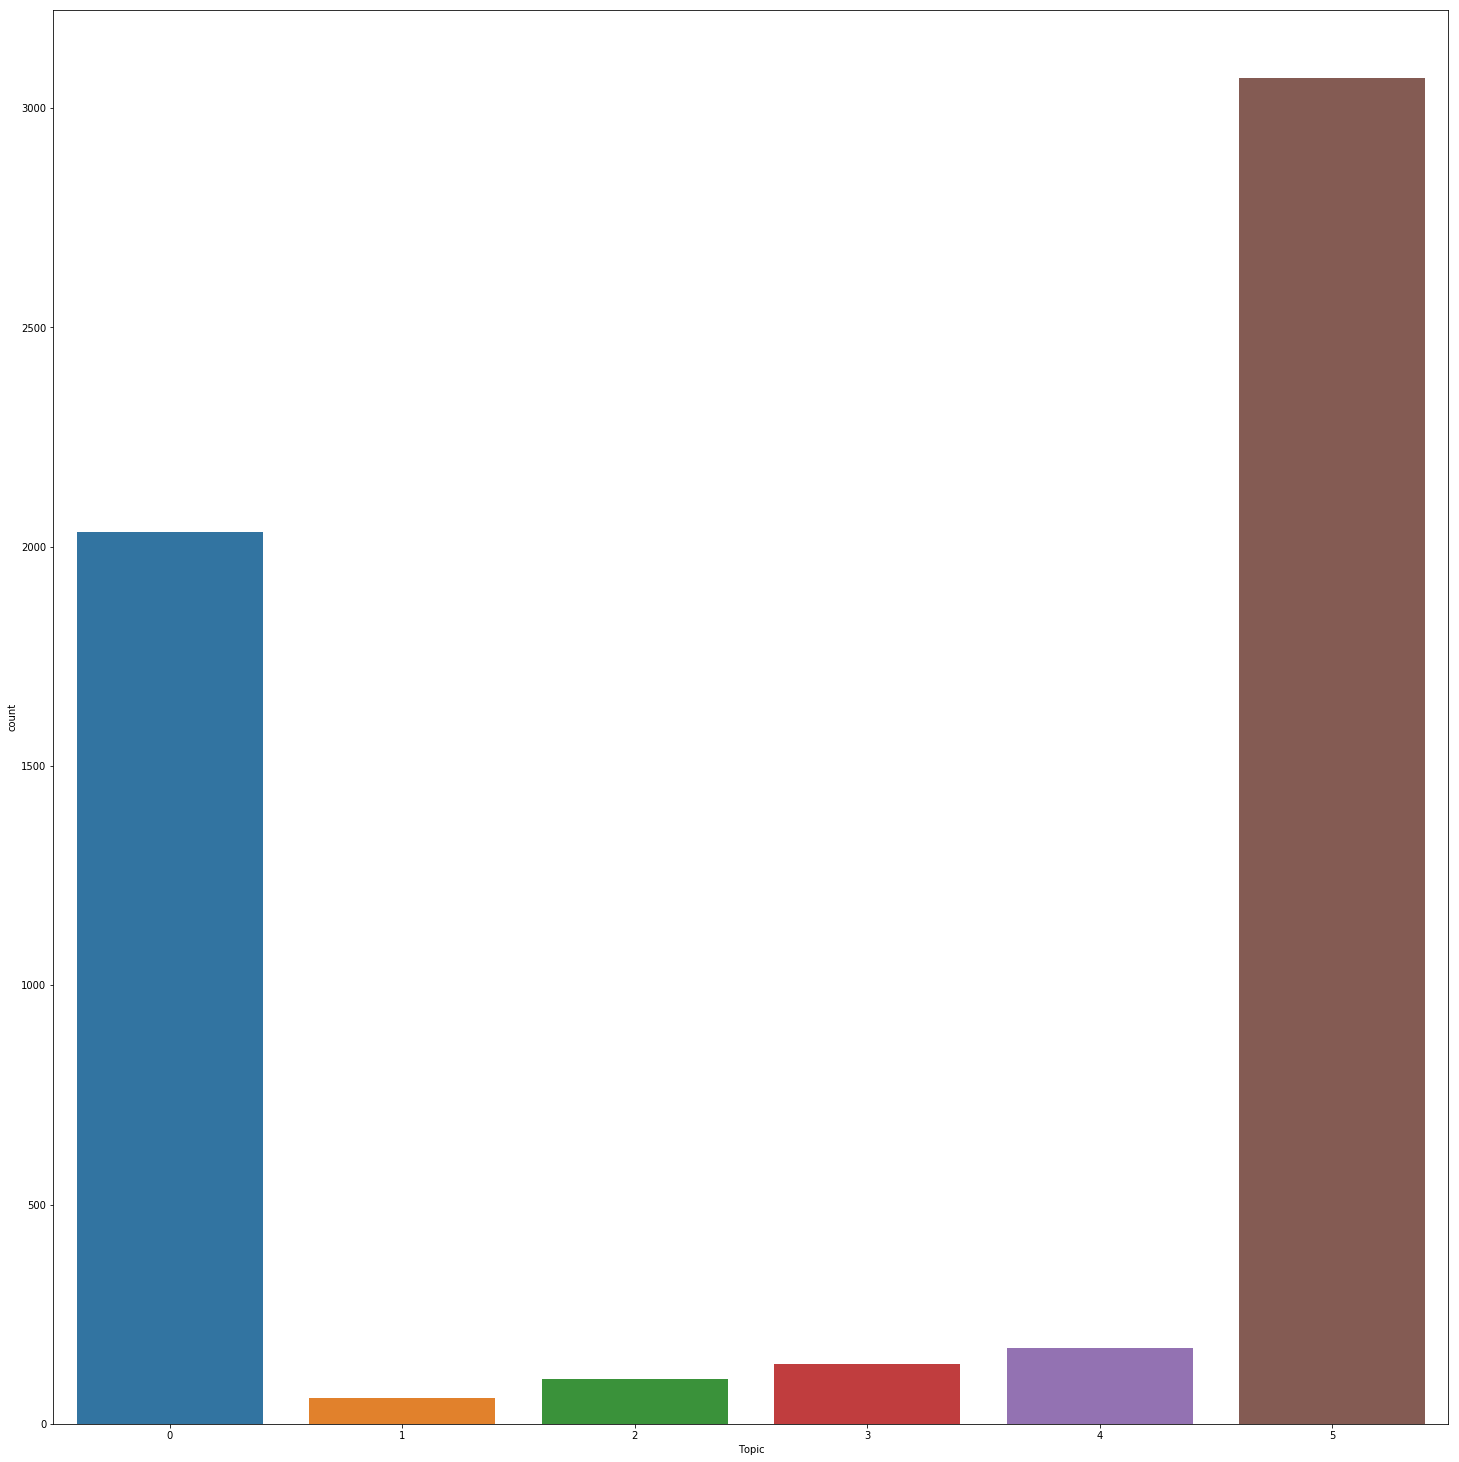

In [14]:
plt.figure(figsize=(25,26))
sns.countplot(x="Topic", data=sms)

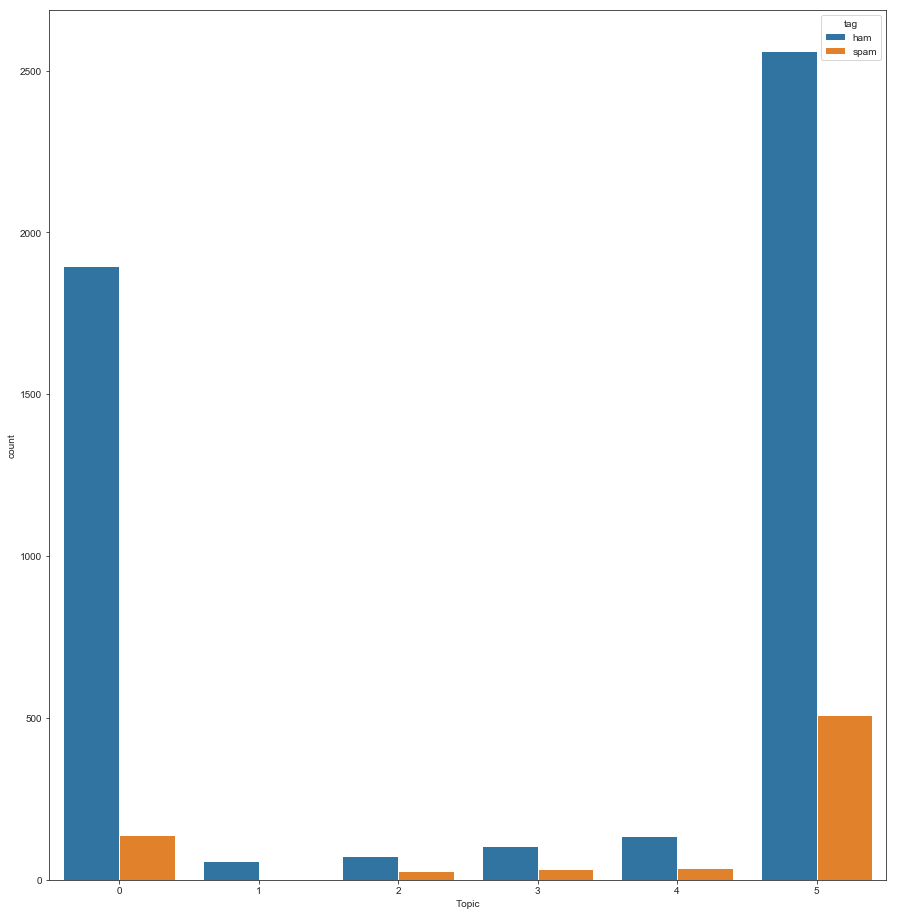

In [15]:
sns.set_style('ticks')
plt.figure(figsize=(15,16))
sns.countplot(x="Topic", hue="tag", data=sms)

In [16]:
topic_results= pd.DataFrame(topic_results)
topic_results = pd.concat([sms['tag'],topic_results], axis=1)
topic_results.head()

,tag,0,1,2,3,4,5
0,ham,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,ham,1.805475e-32,1.306982e-24,9.928879e-14,2.109045e-13,1.704866e-18,2.307954e-08
2,spam,5.589923e-32,6.964915e-26,3.653597e-14,7.760795e-14,2.973742e-19,2.401820e-08
3,ham,8.966896e-33,2.927791e-25,6.859989e-14,1.457166e-13,6.436641e-19,1.859327e-08
4,ham,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [17]:
from sklearn.model_selection import train_test_split

# Clean up dataframe and select target
y = sms['tag']
x = sms_tfidf

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3733, 4939) (1839, 4939) (3733,) (1839,)


In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=2)
svc.fit(x_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
from sklearn.model_selection import cross_validate

# cross validate SVM Classifier
scores_svc = cross_validate(svc, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_svc =pd.DataFrame(scores_svc)
scores_svc

,fit_time,score_time,test_score,train_score
0,0.249940,0.015622,0.935760,0.977648
1,0.218698,0.015622,0.935760,0.980098
2,0.234319,0.015621,0.935760,0.979792
3,0.234312,0.015621,0.925054,0.980710
4,0.249944,0.015621,0.929336,0.979486
5,0.234321,0.015620,0.948498,0.979186
6,0.234326,0.015617,0.939914,0.977961
7,0.234318,0.015624,0.931330,0.978880


In [20]:
print('Mean Test Score of SVM Classifier: ', scores_svc ['test_score'].mean())
print('Mean Train Score of SVM Classifier: ', scores_svc ['train_score'].mean())

Mean Test Score of SVM Classifier:  0.935176590602053
Mean Train Score of SVM Classifier:  0.9792201459378435


In [21]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

[Text(34.0, 0.5, 'Truth'), Text(0.5, 16.0, 'SVC_Prediction')]

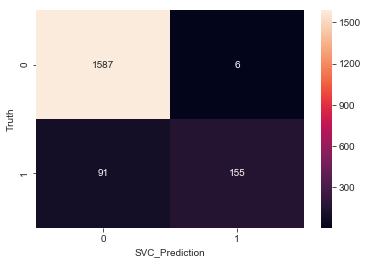

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ax = sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')
ax.set(xlabel='SVC_Prediction', ylabel='Truth')

In [23]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1593
        spam       0.96      0.63      0.76       246

    accuracy                           0.95      1839
   macro avg       0.95      0.81      0.87      1839
weighted avg       0.95      0.95      0.94      1839



In [24]:
accuracy_score(y_test, y_pred_svc)

0.9472539423599783

In [25]:
def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    from sklearn.model_selection import learning_curve
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    #Learning curve definition
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    # commands for plotting
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="green")
    plt.plot(train_sizes, train_scores_mean, '^-', color="red",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '^-', color="green",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

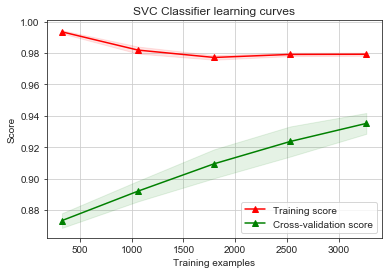

In [26]:
g = plot_learning_curve(svc,"SVC Classifier learning curves",x_train,y_train,cv=8)

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
# cross validate Multinomial NB Classifier
scores_clf = cross_validate(clf, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_clf =pd.DataFrame(scores_clf)
scores_clf

,fit_time,score_time,test_score,train_score
0,0.015621,0.015621,0.888651,0.925597
1,0.015661,0.000000,0.888651,0.930496
2,0.000000,0.015624,0.886510,0.928047
3,0.000000,0.000000,0.886510,0.930496
4,0.000000,0.000000,0.882227,0.928965
5,0.000000,0.000000,0.890558,0.927762
6,0.000000,0.000000,0.901288,0.928987
7,0.015623,0.000000,0.884120,0.927150


In [29]:
print('Mean Test Score of Multinomial NB Classifier: ', scores_clf ['test_score'].mean())
print('Mean Train Score of Multinomial NB Classifier: ', scores_clf ['train_score'].mean())

Mean Test Score of Multinomial NB Classifier:  0.8885642306384465
Mean Train Score of Multinomial NB Classifier:  0.9284375421156582


In [30]:
y_pred_clf = clf.predict(x_test)
y_pred_clf

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

[Text(34.0, 0.5, 'Truth'), Text(0.5, 16.0, 'SVC_Prediction')]

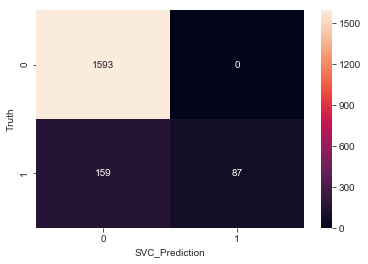

In [31]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d')
ax.set(xlabel='SVC_Prediction', ylabel='Truth')

In [32]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1593
        spam       1.00      0.35      0.52       246

    accuracy                           0.91      1839
   macro avg       0.95      0.68      0.74      1839
weighted avg       0.92      0.91      0.89      1839



In [33]:
accuracy_score(y_test, y_pred_clf) 

0.9135399673735726

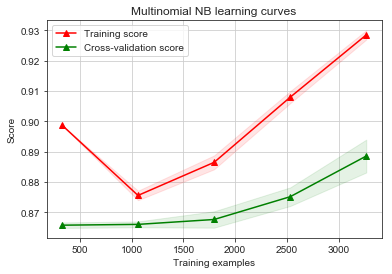

In [34]:
g = plot_learning_curve(clf,"Multinomial NB learning curves",x_train,y_train,cv=8)